In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras


In [23]:
df = pd.read_csv('FADbF_dataset.csv',sep=';')

In [24]:
y = df['fault_location'].values
x = df.drop(['fault_location','fault_type'], axis=1).values
print(x.shape, y.shape)

(168000, 126) (168000,)


In [25]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.1)

In [26]:
norm_layer = Normalization()
activation = 'relu'

def build_model():
    inputs = keras.Input(shape=(x.shape[1],))
    norm_inputs = norm_layer(inputs)
    out = Dense(128, activation=activation)(norm_inputs)
    out1 = Dropout(0.05)(out)
    out = Dense(64, activation=activation)(out1)
    out = Dense(32, activation=activation)(out)
    concat = tf.concat([out, out1], axis=1)
    out = Dense(16, activation=activation)(concat)
    out = Dense(1)(out)
    
    model = keras.models.Model(inputs=inputs, outputs=out)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model


In [27]:
norm_layer.adapt(x)

In [28]:
model = build_model()

In [29]:
history = model.fit(x_train, y_train, epochs=25, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/25


2100/2100 [==============================] - 50s 23ms/step - loss: 2293.0393 - val_loss: 281.9149
Epoch 2/25
2100/2100 [==============================] - 45s 22ms/step - loss: 287.7443 - val_loss: 210.0620
Epoch 3/25
2100/2100 [==============================] - 49s 23ms/step - loss: 226.2674 - val_loss: 183.7226
Epoch 4/25
2100/2100 [==============================] - 48s 23ms/step - loss: 196.7624 - val_loss: 148.8665
Epoch 5/25
2100/2100 [==============================] - 45s 21ms/step - loss: 168.6373 - val_loss: 103.9638
Epoch 6/25
2100/2100 [==============================] - 45s 21ms/step - loss: 151.8509 - val_loss: 105.0590
Epoch 7/25
2100/2100 [==============================] - 46s 22ms/step - loss: 150.6947 - val_loss: 104.9145
Epoch 8/25
2100/2100 [==============================] - 45s 21ms/step - loss: 139.2471 - val_loss: 82.9577
Epoch 9/25
2100/2100 [==============================] - 47s 23ms/step - loss: 130.3729 - val_loss: 118.3317
Epoch 10/25
2100/2100 [================

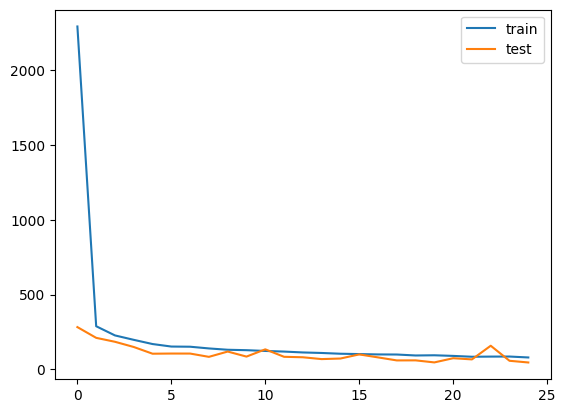

In [30]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
# plt.plot(history.history['auc'], label='train auc')
plt.legend()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, model.predict(x_test))
mae = mean_absolute_error(y_test, model.predict(x_test))
print('MSE:', mse)
print('MAE:', mae)

4725/4725 [==============================] - 10s 2ms/step
MSE: 45.287002125646346
MAE: 4.750453707738464
